# Base de datos de PELICULAS    

In [1]:
import pandas as pd
import plotly.express as px

### Limpiar base de datos

In [2]:
# path_1 = "/curated_movies_metadata.csv"
path_1 = 'C:/Users/ce_ra/Documents/CIMAT/Semestres/Cuarto/Tesis/Codigo/Consultoria/plotly/curated_movies_metadata.csv'

df_movies = pd.read_csv(path_1)

df_movies.head()

C:\Users\ce_ra\AppData\Local\Temp\ipykernel_6468\1240980173.py:4: DtypeWarning: Columns (0,1,10,24,25,26,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv(path_1)


adult    budget     genre1   genre2   genre3 genre4     id    imdb_id  \
0  False  30000000  Animation   Comedy   Family    NaN    862  tt0114709   
1  False  65000000  Adventure  Fantasy   Family    NaN   8844  tt0113497   
2  False         0    Romance   Comedy      NaN    NaN  15602  tt0113228   
3  False  16000000     Comedy    Drama  Romance    NaN  31357  tt0114885   
4  False         0     Comedy      NaN      NaN    NaN  11862  tt0113041   

  original_language               original_title  ... release_month  \
0                en                    Toy Story  ...            10   
1                en                      Jumanji  ...            12   
2                en             Grumpier Old Men  ...            12   
3                en            Waiting to Exhale  ...            12   
4                en  Father of the Bride Part II  ...            02   

   release year      revenue runtime    status  \
0          1995  373554033.0    81.0  Released   
1          1995  262797249.0   104.0  Released   
2          1995          0.0   101.0  Released   
3          1995   81452156.0   127.0  Released   
4          1995   76578911.0   106.0  Released   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 37 columns]

In [3]:
path_2 = 'C:/Users/ce_ra/Documents/CIMAT/Semestres/Cuarto/Tesis/Codigo/Consultoria/plotly/claves_Paises.csv'

country_codes_df = pd.read_csv(path_2)
country_codes_df.columns = ['production_countries1', 'Country']

country_codes_df.head()

production_countries1       Country
0                    AT       Austria
1                    AU     Australia
2                    BE       Belgium
3                    BF  Burkina Faso
4                    BG      Bulgaria

In [4]:
# Merge the datasets on the country code
df = pd.merge(df_movies, country_codes_df, on='production_countries1')

# merged_df.head()
print(df[['production_countries1','revenue','Country']])

      production_countries1      revenue                   Country
0                        US  373554033.0  United States of America
1                        US  262797249.0  United States of America
2                        US          0.0  United States of America
3                        US   81452156.0  United States of America
4                        US   76578911.0  United States of America
...                     ...          ...                       ...
38203                    SK          0.0                  Slovakia
38204                    SK          0.0                  Slovakia
38205                    MT   69411370.0                     Malta
38206                    MT          0.0                     Malta
38207                    LI          0.0             Liechtenstein

[38208 rows x 3 columns]


### 1. ¿Las producciones con más ganancias son hechas exclusivamente en EU?

Primeramente, gráficamos la suma de las ganancias por país

In [5]:
# Select top n countries
top_n = 7

# Group by country and sum the revenue
country_revenue = df.groupby('Country')['revenue'].sum().reset_index()

# Sort the countries by revenue in descending order
country_revenue = country_revenue.sort_values(by='revenue', ascending=False)

# Group by country and sum the revenue
country_revenue = df.groupby('Country')['revenue'].sum().reset_index()

# Sort the countries by revenue in descending order
country_revenue = country_revenue.sort_values(by='revenue', ascending=False)
country_revenue = country_revenue.head(top_n)

# Create the bar chart
fig = px.bar(country_revenue, x='Country', y='revenue', 
             title='Total Revenue by Country',
             labels={'Revenue': 'Total Revenue'},
             template='plotly')

# Show the plot
fig.show()

In [6]:
# # Add a new column to indicate whether the country is the US or another country
# df['Country Group'] = df['Country'].apply(lambda x: 'United States' if x == 'United States' else 'Other Countries')

In [7]:
# # Add a new column to indicate whether the country is the US or another country
# df['Country_Group'] = df['Country'].apply(lambda x: 'United States' if x == 'United States' else 'Other Countries')

# # Classify the movies into five revenue categories
# df['Revenue Category'] = pd.cut(df['revenue'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# # Identify movies in the highest revenue category
# highest_revenue_category = df[df['Revenue Category'] == 'Very High']

# # Count the number of movies from the US and other countries in the highest revenue category
# count_us = highest_revenue_category[highest_revenue_category['Country Group'] == 'United States'].shape[0]
# count_other = highest_revenue_category[highest_revenue_category['Country Group'] == 'Other Countries'].shape[0]

# # Create a new DataFrame for the comparison
# comparison_df = pd.DataFrame({
#     'Country Group': ['United States', 'Other Countries'],
#     'Number of Top Movies': [count_us, count_other]
# })

# # Create the bar chart
# fig = px.bar(comparison_df, x='Country Group', y='Number of Top Movies', 
#              title='Number of Top Revenue Movies in the Highest Category: United States vs Other Countries',
#              labels={'Number of Top Movies': 'Number of Movies', 'Country Group': 'Country Group'},
#              template='plotly')

# # Show the plot
# fig.show()

In [8]:
# Classify the movies into revenue categories
df['Revenue Category'] = pd.cut(df['revenue'], bins=2, labels=['Low', 'High'])

# Select the top N countries
top_n = 3

# Group by country and revenue category, then count the number of movies in each group
count_revenue = df.groupby(['Country', 'Revenue Category']).size().reset_index(name='Number of Movies')
# print(count_revenue)

# df2 = count_revenue.groupby(["Country", "Revenue Category"]).count()
# # print(df2)

# Filter the DataFrame to include only rows where the revenue category is 'High'
count_high_revenue = count_revenue[count_revenue['Revenue Category'] == 'High']
# print(count_high_revenue)

# Sort the countries by count in descending order
count_high_revenue = count_high_revenue.sort_values(by='Number of Movies', ascending=False)
count_high_revenue = count_high_revenue.head(top_n)

# Create the bar chart
fig = px.bar(count_high_revenue, x='Country', y='Number of Movies', 
             title=f'Top {top_n} Countries with more movies which has high revenue',
             labels={'Total Revenue': 'Total Revenue', 'Country': 'Country'},
             template='plotly')

# Show the plot
fig.show()

### 2. ¿Las producciones con más votaciones son en inglés?

In [9]:
# # Filter movies in English
# english_movies = df[df['original_language'] == 'English']

# Create Plotly figure
fig = px.histogram(df, x='original_language', y='vote_average', color='original_language',
                   title='Average Votes for Movies by Language',
                   labels={'votes': 'Number of Votes', 'language': 'Language'},
                   category_orders={'language': ['English', 'Spanish']})

# Update x-axis title
fig.update_xaxes(title_text='Language')

# Update y-axis title
fig.update_yaxes(title_text='Average Votes')

# Show plot
fig.show()

### 3. ¿Hay relación entre la popularidad, el número de votaciones y el promedio de los votos?

In [10]:
# Create Plotly figure
fig = px.scatter(df, y='popularity', x='vote_average', 
                 title='Correlation between Popularity and Average Votes for Movies',
                 labels={'popularity': 'Popularity', 'votes': 'Number of Votes'})

# Update x-axis title
fig.update_xaxes(title_text='Popularity')

# Update y-axis title
fig.update_yaxes(title_text='Number of Votes')

# Show plot
fig.show()

### 4. ¿Hay relación entre la popularidad, el promedio de los votos y las ganancias?


In [11]:

fig = px.scatter_matrix(df,
    dimensions=["popularity", "vote_average", "revenue"])
fig.show()

### 5. ¿Las producciones costosas tienden a tener más ganancias?

In [12]:
fig = px.scatter_matrix(df,
    dimensions=["budget", "revenue"])
fig.show()

### 6. ¿El porcentaje de ganancia neta (dólares ganados por dólar invertido) cambia a lo largo del tiempo?


In [16]:
# Convert column from string to float
df['budget'] = df['budget'].astype(float)
# df['release year'] = df['release year'].astype(float)

# Calculate percentage earned
df['percentage_earned'] = ((df['revenue'] - df['budget']) / df['budget']) * 100

# Group by release year and calculate mean percentage earned
mean_percentage_earned = df.groupby('release year')['percentage_earned'].mean().reset_index()

# Create Plotly figure
fig = px.line(mean_percentage_earned, x='release year', y='percentage_earned', 
              title='Mean Percentage Earned Over Time',
              labels={'percentage_earned': 'Mean Percentage Earned', 'release year': 'Release Year'})

# Show plot
fig.show()

### 7. ¿Qué género o combinación de par de géneros tienden a tener mayor promedio?

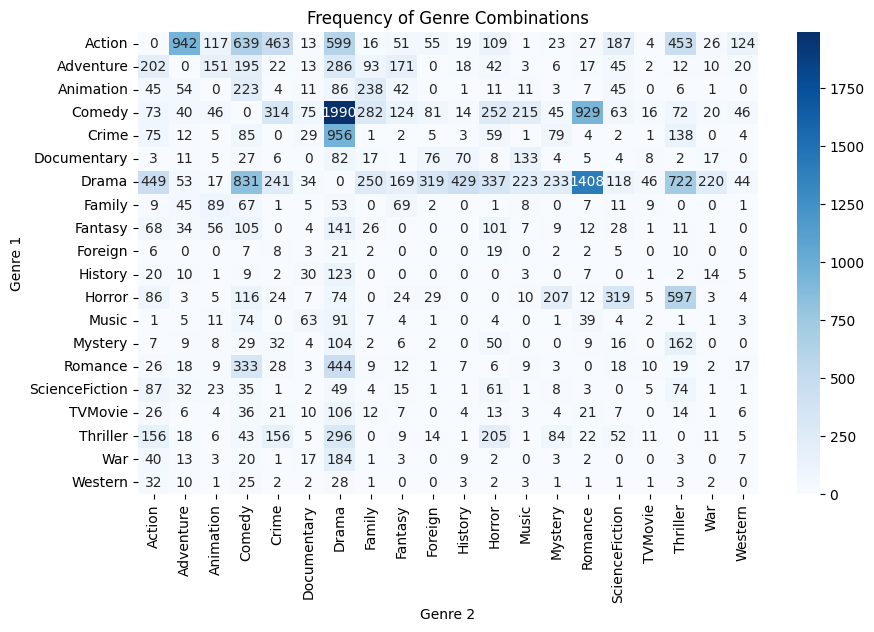

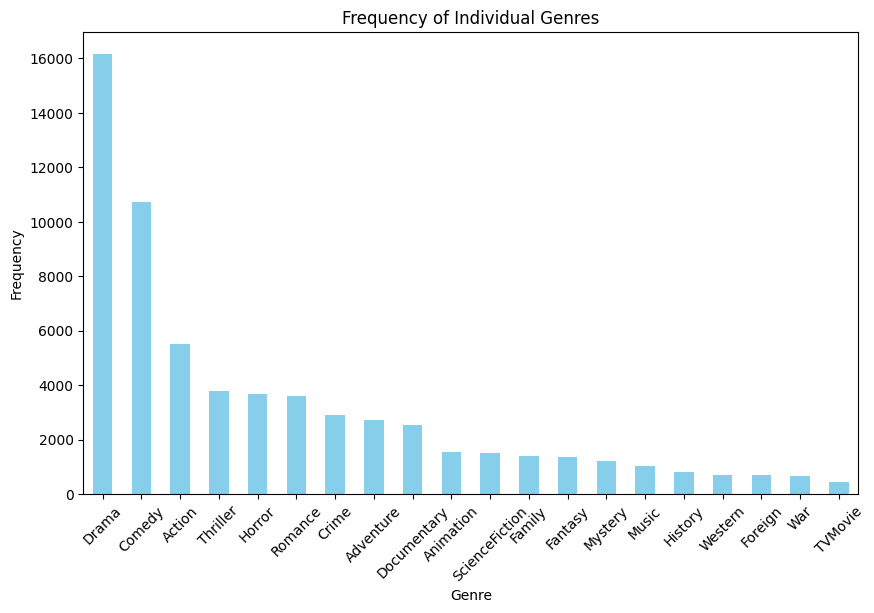

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with combinations of genres
genre_combinations = df.groupby(['genre1', 'genre2']).size().unstack(fill_value=0)

# Plot heatmap for genre combinations
plt.figure(figsize=(10, 6))
sns.heatmap(genre_combinations, annot=True, cmap='Blues', fmt='g')
plt.title('Frequency of Genre Combinations')
plt.xlabel('Genre 2')
plt.ylabel('Genre 1')
plt.show()

# Plot bar plot for individual genres
plt.figure(figsize=(10, 6))
genre_counts = pd.concat([df['genre1'], df['genre2']]).value_counts()
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Individual Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### 8. ¿Las preferencias de géneros cambia a lo largo del tiempo?

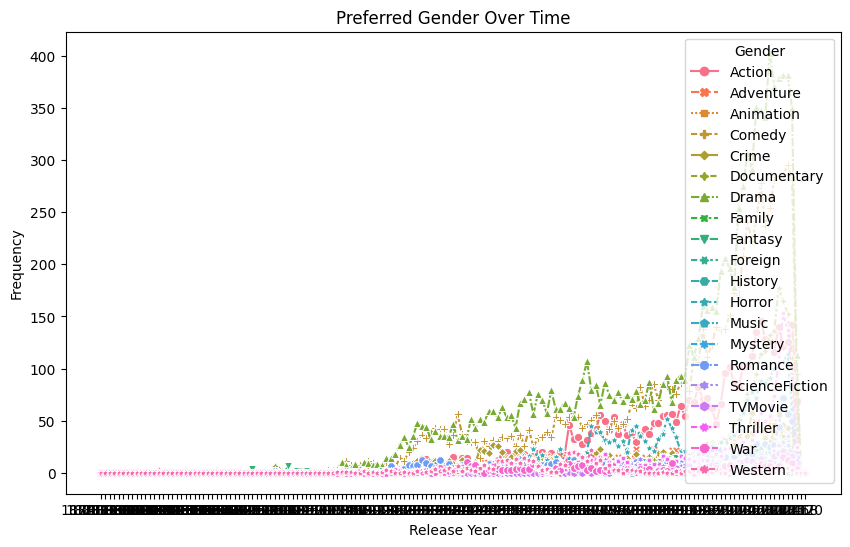

In [22]:
# Group data by release year and gender, then count occurrences
gender_counts_over_time = (df.groupby(['release year', 'genre1'])
                           .size()
                           .unstack(fill_value=0))

# Plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_counts_over_time, markers=True)
plt.title('Preferred Gender Over Time')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()